# Coursework Question 4

Use this notebook as a template for Question 4 - Multi-objective Optimization of Coursework 1.

<span style = "color:limegreen;"> Before beginning I would suggest making a copy of this file to avoid any Git conflicts!</span>

**Question**

An architect has asked you determine what the optimize the design parameters for the window assemblies on a building they are designing. The proposed building is highly glazed, naturally ventilated and in a temperate climate. The design parameters which can be varied are the window-to-wall ratio, depth of the fixed shading, and the u and g-values of the window assembly. The values that they have asked you to optimize are:

<ol type="a">
  <li>Heating energy demand</li>
  <li>Interior lighting energy usage </li>
  <li>Overheating risk</li>
</ol>

You have already performed a number of simulations and retrieved all of the necessary outputs. Your task is to use **both** the pareto front and weighted-sum methods to determine what the optimum design solutions are to this multi-objective problem.

For both methods, Compare the three sets of bi-objective optimizations (a and b; a and c; b and c) and the one tri-objective problem (a, b, and c). When using the weighted-sum first assume that each objective has equal weighting.

Discuss the results of your analysis. What were the optimal solutions returned? Compare the results of the weighted sum method to the pareto front approach, and the results of each combination of objective. Comment on which you think is the best approach and why and any adjustments you would make to the procedure.

## Load all of the necessary Python packages
All packages should work with Conda environment if installed on your machine. Otherwise all necessary packages can be installed in a virtual environment (.venv) in VS Code using: Ctrl+Shift+P > Python: Create Environment > Venv > Python 3.12.x > requirements.txt

<span style="color:orange;"> NOTE: that we are using the paretoset package will be used. You may need to install this package using pip.</span>

In [1]:
import itertools
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import colormaps

import numpy as np
import pandas as pd
from paretoset import paretoset


## 1. Load the data.

The data is located in *outputs/dataset_Coursework_Question4.csv.


In [4]:
df = pd.read_csv("/Users/hlbao/Desktop/benv0166/BENV0166_2025/supplementaryData/dataset_Coursework_Question4.csv")


### 1.1 Convert the raw data into more practical units
The data should contain four columns with building attributes (U-value of windows, g-value of windows, WWR, and the fixed shading depth) plus four columns of performance data. These are the annual sums of lighting and heating energy usage, the peak heating load, and the number of hours above 28C inside the building.

<span style="color:orange;"> Remember that EnergyPlus outputs are in base SI units. </span>

* lightingSum is given in Joules. Convert --> MJ
* heatingSum is given in Joules. Convert --> MJ
* heatingMax is given in Watts. Convert --> kW
* temperature>28C is given in hours.

NOTE: That we won't be using the output *heatingMax* for this exercise.

In [5]:
df["heatingSum"] /= 10**6
df["heatingMax"] /= 10**3
df["lightingSum"] /= 10**6

print ("The first 10 rows of the dataframe look like this.")
print (df.head(10))

The first 10 rows of the dataframe look like this.
   Unnamed: 0  u_windows  g_value  wwr  fixedShadingDepth   heatingSum  \
0           0        0.5      0.2  0.4               0.01  1122.787100   
1           1        0.5      0.2  0.4               0.25  1144.813711   
2           2        0.5      0.2  0.4               0.50  1145.281119   
3           3        0.5      0.2  0.4               0.75  1173.663951   
4           4        0.5      0.2  0.4               1.00  1215.153409   
5           5        0.5      0.2  0.4               1.25  1268.129692   
6           6        0.5      0.2  0.4               1.50  1338.521208   
7           7        0.5      0.2  0.5               0.01  1004.153822   
8           8        0.5      0.2  0.5               0.25  1010.809835   
9           9        0.5      0.2  0.5               0.50  1017.240050   

   heatingMax  lightingSum  temperature>28C  
0    1.891313   512.856513             1147  
1    2.167003   512.857736             113

## 2. Analysis

<span style="color:limegreen;"> Complete the following analysis sections. You can re-use the code in exercise 4A and 4B to help complete the analysis.</span>

In [6]:
col_a = 'heatingSum'
col_b = 'lightingSum'
col_c = 'temperature>28C'
df = df.rename(columns={
    col_a: "J_a_heating",
    col_b: "J_b_lighting",
    col_c: "J_c_overheating"
})

print("\nDataframe renamed：")
print(df.head())


DataFrame renamed：
   Unnamed: 0  u_windows  g_value  wwr  fixedShadingDepth  J_a_heating  \
0           0        0.5      0.2  0.4               0.01  1122.787100   
1           1        0.5      0.2  0.4               0.25  1144.813711   
2           2        0.5      0.2  0.4               0.50  1145.281119   
3           3        0.5      0.2  0.4               0.75  1173.663951   
4           4        0.5      0.2  0.4               1.00  1215.153409   

   heatingMax  J_b_lighting  J_c_overheating  
0    1.891313    512.856513             1147  
1    2.167003    512.857736             1138  
2    1.891464    512.843815             1109  
3    1.892351    512.860402             1082  
4    1.893288    512.873756             1039  


In [20]:
file_path = "/Users/hlbao/Desktop/benv0166/BENV0166_2025/supplementaryData/dataset_Coursework_Question4.csv"

try:
    df = pd.read_csv(file_path)
    print(f"Successfully loaded '{file_path}'")
except FileNotFoundError:
    print(f"Error: File not found. Please check the path: '{file_path}'")
    # Use a relative path if the file is in the same directory:
    # df = pd.read_csv("dataset_Coursework_Question4.csv")

# Scale data
df["heatingSum"] /= 10**6
df["heatingMax"] /= 10**3
df["lightingSum"] /= 10**6

# Rename columns
df = df.rename(columns={
    'heatingSum': "J_a_heating",
    'lightingSum': "J_b_lighting",
    'temperature>28C': "J_c_overheating"
})

print("\nData is ready:")
print(df.head())





Successfully loaded '/Users/hlbao/Desktop/benv0166/BENV0166_2025/supplementaryData/dataset_Coursework_Question4.csv'

Data is ready:
   Unnamed: 0  u_windows  g_value  wwr  fixedShadingDepth  J_a_heating  \
0           0        0.5      0.2  0.4               0.01  1122.787100   
1           1        0.5      0.2  0.4               0.25  1144.813711   
2           2        0.5      0.2  0.4               0.50  1145.281119   
3           3        0.5      0.2  0.4               0.75  1173.663951   
4           4        0.5      0.2  0.4               1.00  1215.153409   

   heatingMax  J_b_lighting  J_c_overheating  
0    1.891313    512.856513             1147  
1    2.167003    512.857736             1138  
2    1.891464    512.843815             1109  
3    1.892351    512.860402             1082  
4    1.893288    512.873756             1039  


### 2.1 Pareto Front Analysis

<span style="color:limegreen;"> Perform the pareto front analysis for the three bi-objective problems and the tri-objective problems here. You are free to improve upon the analysis and visualisations too.</span>

#### 2.1.1 Heating and Lighting

Plotting 2.2.1 Pareto Front: Heating and Lighting...
Found 47 Pareto points for (a,b).


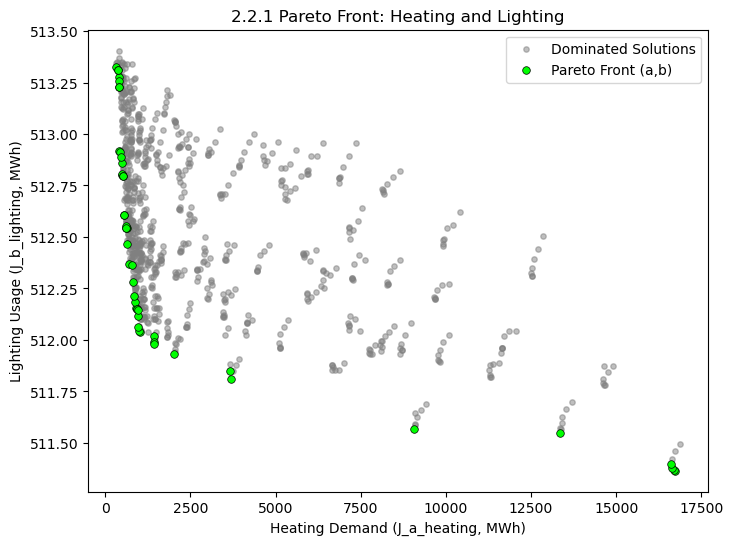

In [26]:
# --- 2.2.1 Heating and Lighting (Pareto Front) ---
print("Plotting 2.2.1 Pareto Front: Heating and Lighting...")

# Calculate Pareto Front
objectives_ab = ['J_a_heating', 'J_b_lighting']
pareto_mask_ab = paretoset(df[objectives_ab], sense=['min', 'min'])
onPareto_ab = df[pareto_mask_ab]
offPareto_ab = df[~pareto_mask_ab]
print(f"Found {len(onPareto_ab)} Pareto points for (a,b).")

# Create a new figure
fig, ax = plt.subplots(figsize=(8, 6))

# Plot dominated solutions
ax.scatter(offPareto_ab['J_a_heating'], offPareto_ab['J_b_lighting'], 
           s=15, c="gray", alpha=0.5, label="Dominated Solutions")

# Plot Pareto front
ax.scatter(onPareto_ab['J_a_heating'], onPareto_ab['J_b_lighting'], 
           s=30, c="lime", alpha=1.0, linewidths=0.5, edgecolors="black", label="Pareto Front (a,b)")

# Set labels and title
ax.set_xlabel("Heating Demand (J_a_heating, MWh)")
ax.set_ylabel("Lighting Usage (J_b_lighting, MWh)")
ax.set_title("2.2.1 Pareto Front: Heating and Lighting")
ax.legend()
plt.show()


#### 2.1.2 Heating and Overheating

Plotting 2.1.2 Heating and Overheating...


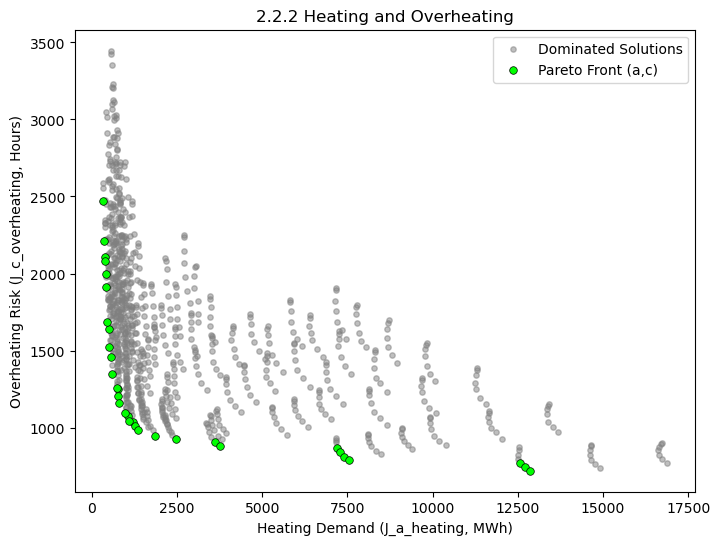

In [32]:
print("Plotting 2.1.2 Heating and Overheating...")

# Create a new figure
fig, ax = plt.subplots(figsize=(8, 6))

# Plot dominated solutions
ax.scatter(offPareto_ac['J_a_heating'], offPareto_ac['J_c_overheating'], 
           s=15, c="gray", alpha=0.5, label="Dominated Solutions")

# Plot Pareto front
ax.scatter(onPareto_ac['J_a_heating'], onPareto_ac['J_c_overheating'], 
           s=30, c="lime", alpha=1.0, linewidths=0.5, edgecolors="black", label="Pareto Front (a,c)")


# Set labels and title
ax.set_xlabel("Heating Demand (J_a_heating, MWh)")
ax.set_ylabel("Overheating Risk (J_c_overheating, Hours)")
ax.set_title("2.2.2 Heating and Overheating")
ax.legend()
plt.show()

#### 2.1.3 Overheating and Lighting

Plotting 2.2.3 Pareto Front: Lighting and Overheating...
Found 10 Pareto points for (b,c).


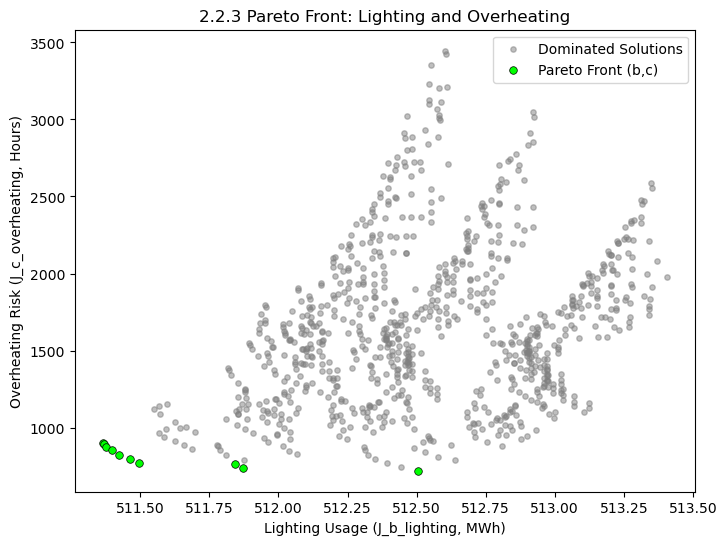

In [30]:
# --- 2.2.3 Lighting and Overheating (Pareto Front) ---
print("Plotting 2.2.3 Pareto Front: Lighting and Overheating...")

# Calculate Pareto Front
objectives_bc = ['J_b_lighting', 'J_c_overheating']
pareto_mask_bc = paretoset(df[objectives_bc], sense=['min', 'min'])
onPareto_bc = df[pareto_mask_bc]
offPareto_bc = df[~pareto_mask_bc]
print(f"Found {len(onPareto_bc)} Pareto points for (b,c).")

# Create a new figure
fig, ax = plt.subplots(figsize=(8, 6))

# Plot dominated solutions
ax.scatter(offPareto_bc['J_b_lighting'], offPareto_bc['J_c_overheating'], 
           s=15, c="gray", alpha=0.5, label="Dominated Solutions")

# Plot Pareto front
ax.scatter(onPareto_bc['J_b_lighting'], onPareto_bc['J_c_overheating'], 
           s=30, c="lime", alpha=1.0, linewidths=0.5, edgecolors="black", label="Pareto Front (b,c)")

# Set labels and title
ax.set_xlabel("Lighting Usage (J_b_lighting, MWh)")
ax.set_ylabel("Overheating Risk (J_c_overheating, Hours)")
ax.set_title("2.2.3 Pareto Front: Lighting and Overheating")
ax.legend()
plt.show()

#### 2.1.4 Heating, Lighting, and Overheating

Plotting 2.2.4 Pareto Front: Tri-Objective...
Found 164 Pareto points for (a,b,c).


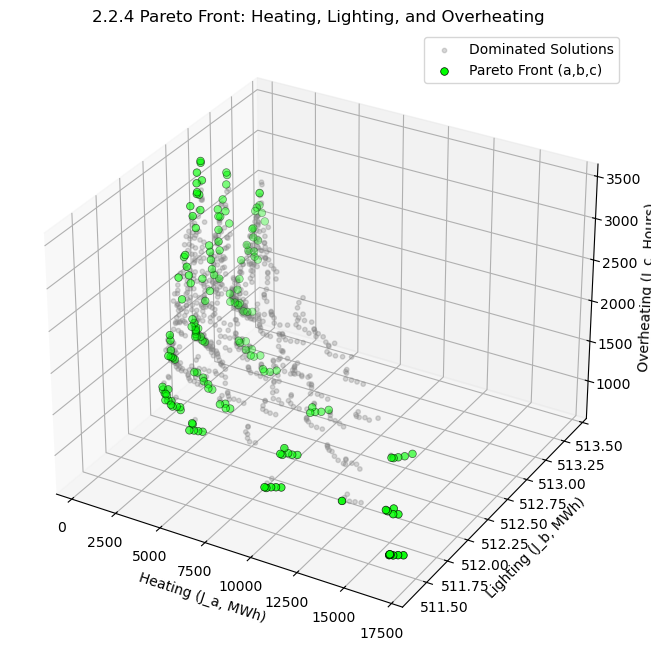

In [28]:

print("Plotting 2.2.4 Pareto Front: Tri-Objective...")

# Calculate Pareto Front
objectives_abc = ['J_a_heating', 'J_b_lighting', 'J_c_overheating']
pareto_mask_abc = paretoset(df[objectives_abc], sense=['min', 'min', 'min'])
onPareto_abc = df[pareto_mask_abc]
offPareto_abc = df[~pareto_mask_abc]
print(f"Found {len(onPareto_abc)} Pareto points for (a,b,c).")

# Create a new 3D figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot dominated solutions
ax.scatter(offPareto_abc['J_a_heating'], offPareto_abc['J_b_lighting'], offPareto_abc['J_c_overheating'], 
           c='gray', s=10, alpha=0.3, label="Dominated Solutions")

# Plot Pareto front
ax.scatter(onPareto_abc['J_a_heating'], onPareto_abc['J_b_lighting'], onPareto_abc['J_c_overheating'], 
           c='lime', s=30, edgecolors="black", linewidths=0.5, label="Pareto Front (a,b,c)")

# Set labels and title
ax.set_xlabel("Heating (J_a, MWh)")
ax.set_ylabel("Lighting (J_b, MWh)")
ax.set_zlabel("Overheating (J_c, Hours)")
ax.set_title("2.2.4 Pareto Front: Heating, Lighting, and Overheating")
ax.legend()
plt.show()

### 2.2 Weighted Sum Analysis

#### 2.2.1 Heating and Lighting

Plotting 2.1.1 Weighted Sum: Heating and Lighting...


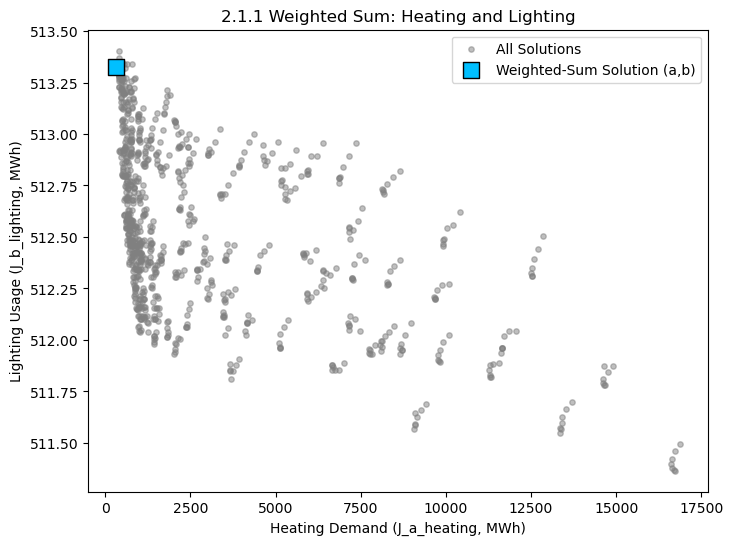

In [22]:
print("Plotting 2.1.1 Weighted Sum: Heating and Lighting...")

# Calculate Weighted Sum
df['J_sum_ab'] = (0.5 * df['J_a_heating']) + (0.5 * df['J_b_lighting'])
min_sum_ab_idx = df['J_sum_ab'].idxmin()

# Create a new figure
fig, ax = plt.subplots(figsize=(8, 6))

# Plot all solutions
ax.scatter(df['J_a_heating'], df['J_b_lighting'], 
           s=15, c="gray", alpha=0.5, label="All Solutions")

# Plot weighted-sum solution
ax.scatter(df.loc[min_sum_ab_idx, 'J_a_heating'], df.loc[min_sum_ab_idx, 'J_b_lighting'], 
           s=120, c="deepskyblue", alpha=1.0, linewidths=1.0, edgecolors="black", marker="s", label="Weighted-Sum Solution (a,b)")

# Set labels and title
ax.set_xlabel("Heating Demand (J_a_heating, MWh)")
ax.set_ylabel("Lighting Usage (J_b_lighting, MWh)")
ax.set_title("2.1.1 Weighted Sum: Heating and Lighting")
ax.legend()
plt.show()

#### 2.2.2 Heating and Overheating

Plotting 2.1.2 Weighted Sum: Heating and Overheating...


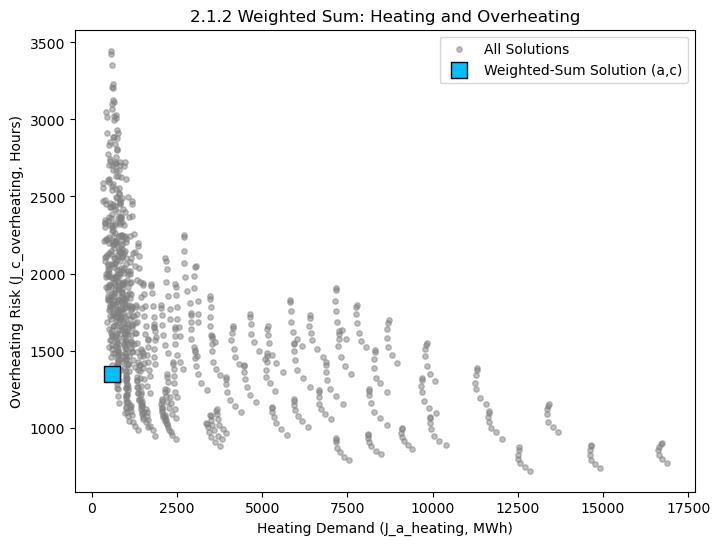

In [23]:
print("Plotting 2.1.2 Weighted Sum: Heating and Overheating...")

# Calculate Weighted Sum
df['J_sum_ac'] = (0.5 * df['J_a_heating']) + (0.5 * df['J_c_overheating'])
min_sum_ac_idx = df['J_sum_ac'].idxmin()

# Create a new figure
fig, ax = plt.subplots(figsize=(8, 6))

# Plot all solutions
ax.scatter(df['J_a_heating'], df['J_c_overheating'], 
           s=15, c="gray", alpha=0.5, label="All Solutions")

# Plot weighted-sum solution
ax.scatter(df.loc[min_sum_ac_idx, 'J_a_heating'], df.loc[min_sum_ac_idx, 'J_c_overheating'], 
           s=120, c="deepskyblue", alpha=1.0, linewidths=1.0, edgecolors="black", marker="s", label="Weighted-Sum Solution (a,c)")

# Set labels and title
ax.set_xlabel("Heating Demand (J_a_heating, MWh)")
ax.set_ylabel("Overheating Risk (J_c_overheating, Hours)")
ax.set_title("2.1.2 Weighted Sum: Heating and Overheating")
ax.legend()
plt.show()

#### 2.2.3 Overheating and Lighting

Plotting 2.1.3 Weighted Sum: Lighting and Overheating...


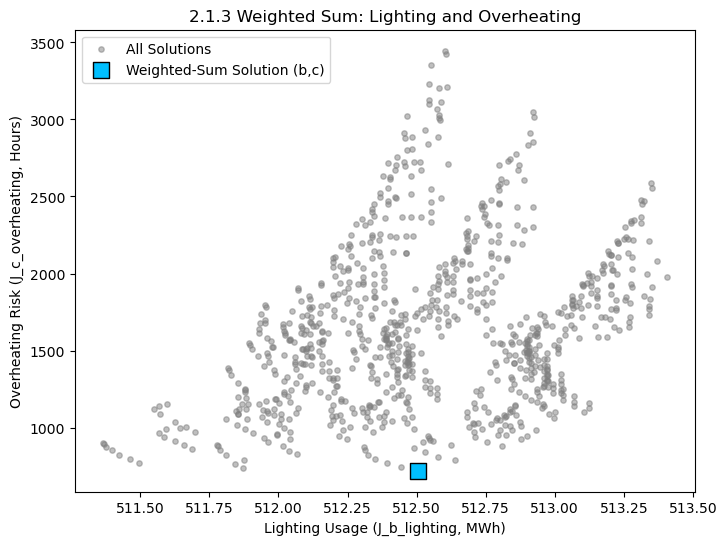

In [24]:
print("Plotting 2.1.3 Weighted Sum: Lighting and Overheating...")

# Calculate Weighted Sum
df['J_sum_bc'] = (0.5 * df['J_b_lighting']) + (0.5 * df['J_c_overheating'])
min_sum_bc_idx = df['J_sum_bc'].idxmin()

# Create a new figure
fig, ax = plt.subplots(figsize=(8, 6))

# Plot all solutions
ax.scatter(df['J_b_lighting'], df['J_c_overheating'], 
           s=15, c="gray", alpha=0.5, label="All Solutions")

# Plot weighted-sum solution
ax.scatter(df.loc[min_sum_bc_idx, 'J_b_lighting'], df.loc[min_sum_bc_idx, 'J_c_overheating'], 
           s=120, c="deepskyblue", alpha=1.0, linewidths=1.0, edgecolors="black", marker="s", label="Weighted-Sum Solution (b,c)")

# Set labels and title
ax.set_xlabel("Lighting Usage (J_b_lighting, MWh)")
ax.set_ylabel("Overheating Risk (J_c_overheating, Hours)")
ax.set_title("2.1.3 Weighted Sum: Lighting and Overheating")
ax.legend()
plt.show()

#### 2.2.4 Heating, Lighting, and Overheating

Plotting 2.1.4 Weighted Sum: Tri-Objective...


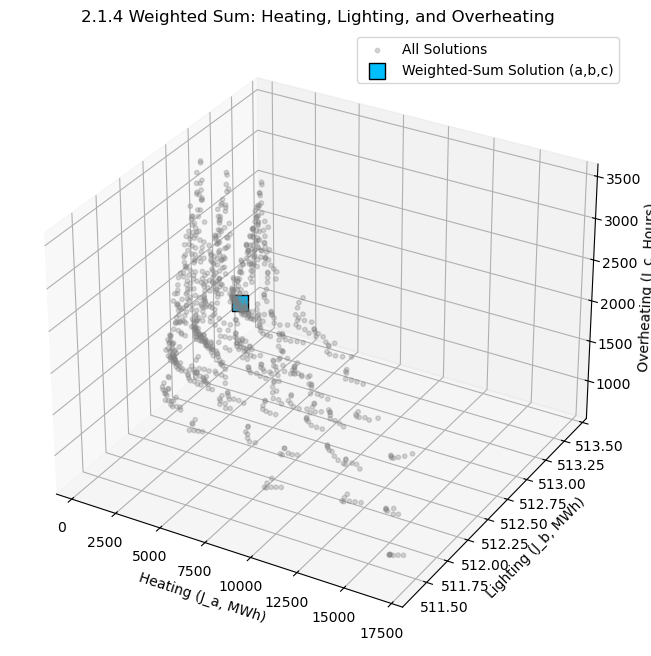

In [25]:
# --- 2.1.4 Heating, Lighting, and Overheating (Weighted Sum) ---
print("Plotting 2.1.4 Weighted Sum: Tri-Objective...")

# Calculate Weighted Sum
df['J_sum_abc'] = (1/3 * df['J_a_heating']) + (1/3 * df['J_b_lighting']) + (1/3 * df['J_c_overheating'])
min_sum_abc_idx = df['J_sum_abc'].idxmin()

# Create a new 3D figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot all solutions
ax.scatter(df['J_a_heating'], df['J_b_lighting'], df['J_c_overheating'], 
           c='gray', s=10, alpha=0.3, label="All Solutions")

# Plot weighted-sum solution
ax.scatter(df.loc[min_sum_abc_idx, 'J_a_heating'], df.loc[min_sum_abc_idx, 'J_b_lighting'], df.loc[min_sum_abc_idx, 'J_c_overheating'], 
           c='deepskyblue', marker='s', s=120, edgecolors="black", linewidths=1.0, label="Weighted-Sum Solution (a,b,c)")

# Set labels and title
ax.set_xlabel("Heating (J_a, MWh)")
ax.set_ylabel("Lighting (J_b, MWh)")
ax.set_zlabel("Overheating (J_c, Hours)")
ax.set_title("2.1.4 Weighted Sum: Heating, Lighting, and Overheating")
ax.legend()
plt.show()

### 3. Additional analysis (optional)

Plotting Combined Comparison 2.1.1...


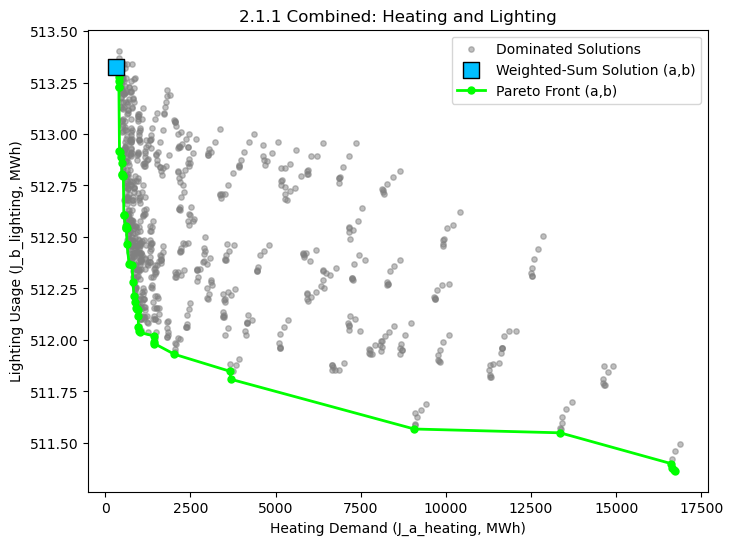

In [34]:
# --- 2.1.1 Heating and Lighting (Combined Plot) ---
print("Plotting Combined Comparison 2.1.1...")


fig, ax = plt.subplots(figsize=(8, 6))

# 1. Plot dominated solutions
ax.scatter(offPareto_ab['J_a_heating'], offPareto_ab['J_b_lighting'], 
           s=15, c="gray", alpha=0.5, label="Dominated Solutions")

# 2. Plot weighted-sum solution
ax.scatter(df.loc[min_sum_ab_idx, 'J_a_heating'], df.loc[min_sum_ab_idx, 'J_b_lighting'], 
           s=120, c="deepskyblue", alpha=1.0, linewidths=1.0, edgecolors="black", marker="s", label="Weighted-Sum Solution (a,b)", zorder=3)

# --- 3. Plot the connected Pareto Front ---
#    Sort by x-axis to connect them properly
onPareto_ab_sorted = onPareto_ab.sort_values(by='J_a_heating')
    
#    Use .plot() to create a line plot
ax.plot(onPareto_ab_sorted['J_a_heating'], onPareto_ab_sorted['J_b_lighting'], 
        c='lime', 
        marker='o', # Show a marker at each data point
        markersize=5, 
        linestyle='-', # Use a solid line
        linewidth=2, 
        label="Pareto Front (a,b)",
        zorder=2) # Ensure the line is drawn on top of the gray dots

# Set labels and title
ax.set_xlabel("Heating Demand (J_a_heating, MWh)")
ax.set_ylabel("Lighting Usage (J_b_lighting, MWh)")
ax.set_title("2.1.1 Combined: Heating and Lighting")
ax.legend()
plt.show()

Plotting Combined Comparison 2.1.2...


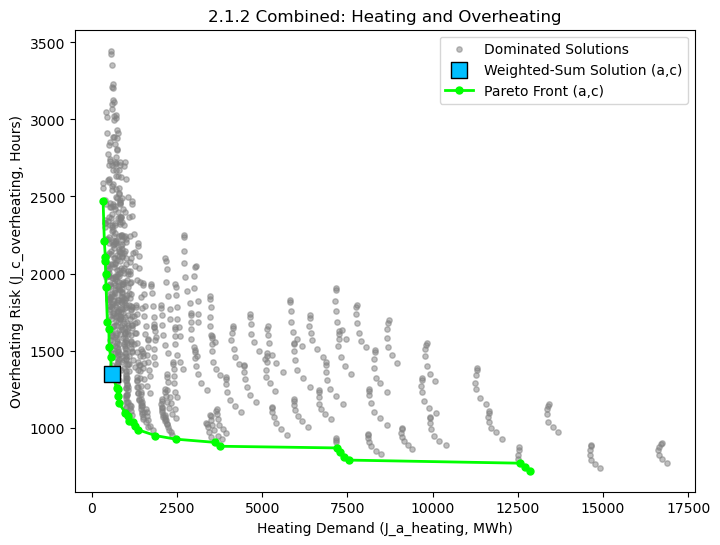

In [35]:
# --- 2.1.2 Heating and Overheating (Combined Plot) ---
print("Plotting Combined Comparison 2.1.2...")

# Create a new figure
fig, ax = plt.subplots(figsize=(8, 6))

# 1. Plot dominated solutions
ax.scatter(offPareto_ac['J_a_heating'], offPareto_ac['J_c_overheating'], 
           s=15, c="gray", alpha=0.5, label="Dominated Solutions")

# 2. Plot weighted-sum solution
ax.scatter(df.loc[min_sum_ac_idx, 'J_a_heating'], df.loc[min_sum_ac_idx, 'J_c_overheating'], 
           s=120, c="deepskyblue", alpha=1.0, linewidths=1.0, edgecolors="black", marker="s", label="Weighted-Sum Solution (a,c)", zorder=3)

# --- 3. Plot the connected Pareto Front ---
#    Sort by x-axis (Heating)
onPareto_ac_sorted = onPareto_ac.sort_values(by='J_a_heating')
    
#    Use .plot() to create a line plot
ax.plot(onPareto_ac_sorted['J_a_heating'], onPareto_ac_sorted['J_c_overheating'], 
        c='lime', marker='o', markersize=5, linestyle='-', linewidth=2, 
        label="Pareto Front (a,c)", zorder=2)

# Set labels and title
ax.set_xlabel("Heating Demand (J_a_heating, MWh)")
ax.set_ylabel("Overheating Risk (J_c_overheating, Hours)")
ax.set_title("2.1.2 Combined: Heating and Overheating")
ax.legend()
plt.show()

Plotting Combined Comparison 2.1.3...


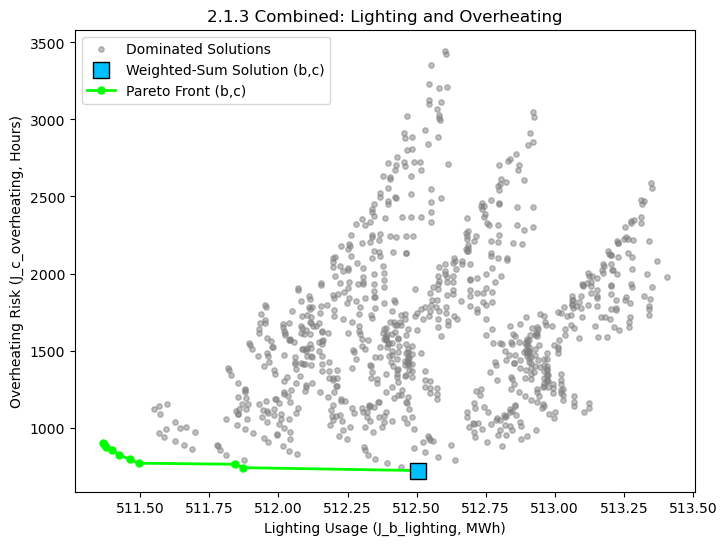

In [36]:
# --- 2.1.3 Lighting and Overheating (Combined Plot) ---
print("Plotting Combined Comparison 2.1.3...")

# Create a new figure
fig, ax = plt.subplots(figsize=(8, 6))

# 1. Plot dominated solutions
ax.scatter(offPareto_bc['J_b_lighting'], offPareto_bc['J_c_overheating'], 
           s=15, c="gray", alpha=0.5, label="Dominated Solutions")

# 2. Plot weighted-sum solution
ax.scatter(df.loc[min_sum_bc_idx, 'J_b_lighting'], df.loc[min_sum_bc_idx, 'J_c_overheating'], 
           s=120, c="deepskyblue", alpha=1.0, linewidths=1.0, edgecolors="black", marker="s", label="Weighted-Sum Solution (b,c)", zorder=3)

# --- 3. Plot the connected Pareto Front ---
#    Sort by x-axis (Lighting)
onPareto_bc_sorted = onPareto_bc.sort_values(by='J_b_lighting')
    
#    Use .plot() to create a line plot
ax.plot(onPareto_bc_sorted['J_b_lighting'], onPareto_bc_sorted['J_c_overheating'], 
        c='lime', marker='o', markersize=5, linestyle='-', linewidth=2, 
        label="Pareto Front (b,c)", zorder=2)

# Set labels and title
ax.set_xlabel("Lighting Usage (J_b_lighting, MWh)")
ax.set_ylabel("Overheating Risk (J_c_overheating, Hours)")
ax.set_title("2.1.3 Combined: Lighting and Overheating")
ax.legend()
plt.show()

Plotting Combined Comparison 2.1.4...


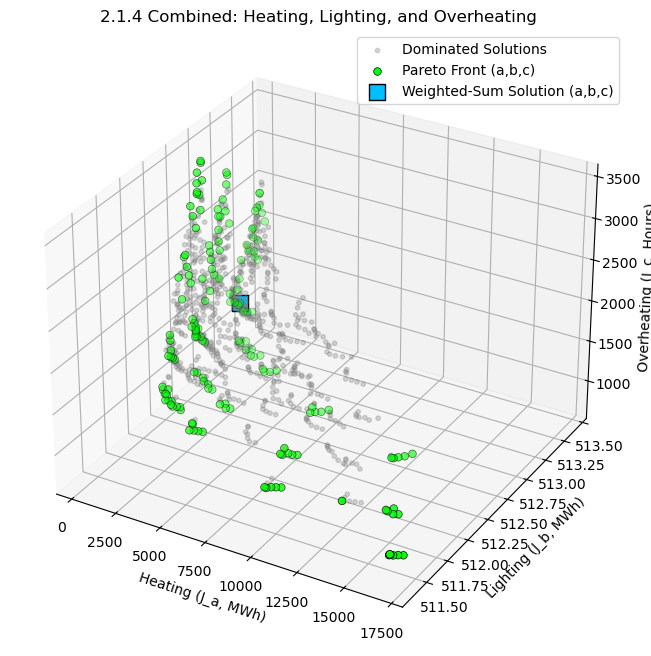

In [37]:
# --- 2.1.4 Heating, Lighting, and Overheating (Combined Plot) ---
print("Plotting Combined Comparison 2.1.4...")

# Create a new 3D figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 1. Plot dominated solutions
ax.scatter(offPareto_abc['J_a_heating'], offPareto_abc['J_b_lighting'], offPareto_abc['J_c_overheating'], 
           c='gray', s=10, alpha=0.3, label="Dominated Solutions")

# 2. Plot Pareto front (as scatter for 3D clarity)
ax.scatter(onPareto_abc['J_a_heating'], onPareto_abc['J_b_lighting'], onPareto_abc['J_c_overheating'], 
           c='lime', s=30, edgecolors="black", linewidths=0.5, label="Pareto Front (a,b,c)", zorder=2)

# 3. Plot weighted-sum solution
ax.scatter(df.loc[min_sum_abc_idx, 'J_a_heating'], df.loc[min_sum_abc_idx, 'J_b_lighting'], df.loc[min_sum_abc_idx, 'J_c_overheating'], 
           c='deepskyblue', marker='s', s=120, edgecolors="black", linewidths=1.0, label="Weighted-Sum Solution (a,b,c)", zorder=3)

# Set labels and title
ax.set_xlabel("Heating (J_a, MWh)")
ax.set_ylabel("Lighting (J_b, MWh)")
ax.set_zlabel("Overheating (J_c, Hours)")
ax.set_title("2.1.4 Combined: Heating, Lighting, and Overheating")
ax.legend()
plt.show()


In [40]:
print("--- 3-Objective Weighted-Sum Solution (The 'Blue Square' in the 3D plot) ---")
solution_abc = df.loc[min_sum_abc_idx]
print(solution_abc)
print("\n--- 2-Objective Weighted-Sum Solutions ---")
solution_ab = df.loc[min_sum_ab_idx]
print("\n(a,b) Heating vs Lighting solution:\n", solution_ab[['J_a_heating', 'J_b_lighting']])

solution_ac = df.loc[min_sum_ac_idx]
print("\n(a,c) Heating vs Overheating solution:\n", solution_ac[['J_a_heating', 'J_c_overheating']])

solution_bc = df.loc[min_sum_bc_idx]
print("\n(b,c) Lighting vs Overheating solution:\n", solution_bc[['J_b_lighting', 'J_c_overheating']])

--- 3-Objective Weighted-Sum Solution (The 'Blue Square' in the 3D plot) ---
Unnamed: 0             48.000000
u_windows               0.500000
g_value                 0.400000
wwr                     0.400000
fixedShadingDepth       1.500000
J_a_heating           576.450667
heatingMax              2.648589
J_b_lighting          513.021123
J_c_overheating      1347.000000
J_sum_ab              544.735895
J_sum_ac              961.725334
J_sum_bc              930.010561
J_sum_abc             812.157263
Name: 48, dtype: float64

--- 2-Objective Weighted-Sum Solutions ---

(a,b) Heating vs Lighting solution:
 J_a_heating     327.809062
J_b_lighting    513.323640
Name: 128, dtype: float64

(a,c) Heating vs Overheating solution:
 J_a_heating         576.450667
J_c_overheating    1347.000000
Name: 48, dtype: float64

(b,c) Lighting vs Overheating solution:
 J_b_lighting       512.505893
J_c_overheating    721.000000
Name: 741, dtype: float64


In [42]:
# --- 2. Show the Pareto Front "Menu" ---

print("--- 3-Objective Pareto Front (onPareto_abc DataFrame) ---")
print(f"Found {len(onPareto_abc)} optimal solutions in the 3D Pareto Front.")

pd.set_option('display.max_rows', 100)


columns_to_see = ['u_windows', 'g_value', 'wwr', 'fixedShadingDepth', 'J_a_heating', 'J_b_lighting', 'J_c_overheating']

print(onPareto_abc[columns_to_see])

print("--- 3-Objective Pareto Front (onPareto_abc DataFrame) ---")
print(f"Found {len(onPareto_abc)} optimal solutions in the 3D Pareto Front.")

pd.set_option('display.max_rows', 100)

# We want to see the design parameters AND the objective values
columns_to_see = ['u_windows', 'g_value', 'wwr', 'fixedShadingDepth', 'J_a_heating', 'J_b_lighting', 'J_c_overheating']

print(onPareto_abc[columns_to_see])

--- 3-Objective Pareto Front (onPareto_abc DataFrame) ---
Found 164 optimal solutions in the 3D Pareto Front.
     u_windows  g_value  wwr  fixedShadingDepth   J_a_heating  J_b_lighting  \
4          0.5      0.2  0.4               1.00   1215.153409    512.873756   
5          0.5      0.2  0.4               1.25   1268.129692    512.879214   
6          0.5      0.2  0.4               1.50   1338.521208    512.933341   
12         0.5      0.2  0.5               1.25   1062.887790    512.383058   
13         0.5      0.2  0.5               1.50   1093.725756    512.410366   
..         ...      ...  ...                ...           ...           ...   
752        6.0      0.2  0.6               0.75  16617.569638    511.399090   
753        6.0      0.2  0.6               1.00  16644.268651    511.423624   
754        6.0      0.2  0.6               1.25  16732.104434    511.461856   
755        6.0      0.2  0.6               1.50  16870.040363    511.494208   
772        6.0      0

In [43]:
# --- 3. Find Specific "Extreme" Points from the 3-Objective Pareto Front ---
print("--- Finding 'Specialist' solutions from the 3D Pareto Front ---")

# We will use the 'onPareto_abc' DataFrame we just printed

# --- Find the "Lowest Heating" solution ---
# We sort the Pareto "menu" by 'J_a_heating' and take the first one (.iloc[0])
solution_min_heating = onPareto_abc.sort_values(by='J_a_heating').iloc[0]
print("\n--- Solution with MINIMUM HEATING (Scheme A) ---")
print(solution_min_heating[columns_to_see])

# --- Find the "Lowest Lighting" solution ---
solution_min_lighting = onPareto_abc.sort_values(by='J_b_lighting').iloc[0]
print("\n--- Solution with MINIMUM LIGHTING ---")
print(solution_min_lighting[columns_to_see])

# --- Find the "Lowest Overheating" solution ---
solution_min_overheating = onPareto_abc.sort_values(by='J_c_overheating').iloc[0]
print("\n--- Solution with MINIMUM OVERHEATING (Scheme B) ---")
print(solution_min_overheating[columns_to_see])

# --- Find the "Balanced" solution (the one closest to the 'blue square') ---
print("\n--- 'Balanced' Solution (The Weighted-Sum point, for comparison) ---")
print(df.loc[min_sum_abc_idx][columns_to_see])

--- Finding 'Specialist' solutions from the 3D Pareto Front ---

--- Solution with MINIMUM HEATING (Scheme A) ---
u_windows               0.500000
g_value                 0.800000
wwr                     0.400000
fixedShadingDepth       0.500000
J_a_heating           327.809062
J_b_lighting          513.323640
J_c_overheating      2470.000000
Name: 128, dtype: float64

--- Solution with MINIMUM LIGHTING ---
u_windows                6.000000
g_value                  0.200000
wwr                      0.600000
fixedShadingDepth        0.010000
J_a_heating          16722.611613
J_b_lighting           511.365602
J_c_overheating        903.000000
Name: 749, dtype: float64

--- Solution with MINIMUM OVERHEATING (Scheme B) ---
u_windows                6.000000
g_value                  0.200000
wwr                      0.400000
fixedShadingDepth        1.500000
J_a_heating          12852.002021
J_b_lighting           512.505893
J_c_overheating        721.000000
Name: 741, dtype: float64

--- 'B

In [45]:
# --- 1. 定义我们关心的列 ---
columns_to_see = ['u_windows', 'g_value', 'wwr', 'fixedShadingDepth', 'J_a_heating', 'J_b_lighting', 'J_c_overheating']

print("--- Checking for Overlapping Points in ALL scenarios ---")

# --- 2. 检查 (a) Heating vs (b) Lighting ---
print("\n--- 2.1.1 (a,b) Heating vs Lighting ---")

# (a,b)的加权和冠军索引
ws_idx_ab = min_sum_ab_idx
print(f"Weighted-Sum 'champion' index: {ws_idx_ab}")

# (a,b)的帕累托前沿索引
pareto_indices_ab = set(onPareto_ab.index)
print(f"Total points on 2D Pareto Front: {len(pareto_indices_ab)}")

# 检查重合
if ws_idx_ab in pareto_indices_ab:
    print(f"OVERLAP: Yes, the Weighted-Sum champion (Index {ws_idx_ab}) is on the (a,b) Pareto Front.")
    print("Data for this point:")
    print(df.loc[ws_idx_ab, columns_to_see])
else:
    print(f"NO OVERLAP: The Weighted-Sum champion (Index {ws_idx_ab}) is NOT on the (a,b) Pareto Front.")

    
# --- 3. 检查 (a) Heating vs (c) Overheating ---
print("\n--- 2.1.2 (a,c) Heating vs Overheating ---")

# (a,c)的加权和冠军索引
ws_idx_ac = min_sum_ac_idx
print(f"Weighted-Sum 'champion' index: {ws_idx_ac}")

# (a,c)的帕累托前沿索引
pareto_indices_ac = set(onPareto_ac.index)
print(f"Total points on 2D Pareto Front: {len(pareto_indices_ac)}")

# 检查重合
if ws_idx_ac in pareto_indices_ac:
    print(f"OVERLAP: Yes, the Weighted-Sum champion (Index {ws_idx_ac}) is on the (a,c) Pareto Front.")
    print("Data for this point:")
    print(df.loc[ws_idx_ac, columns_to_see])
else:
    print(f"NO OVERLAP: The Weighted-Sum champion (Index {ws_idx_ac}) is NOT on the (a,c) Pareto Front.")

    
# --- 4. 检查 (b) Lighting vs (c) Overheating ---
print("\n--- 2.1.3 (b,c) Lighting vs Overheating ---")

# (b,c)的加权和冠军索引
ws_idx_bc = min_sum_bc_idx
print(f"Weighted-Sum 'champion' index: {ws_idx_bc}")

# (b,c)的帕累托前沿索引
pareto_indices_bc = set(onPareto_bc.index)
print(f"Total points on 2D Pareto Front: {len(pareto_indices_bc)}")

# 检查重合
if ws_idx_bc in pareto_indices_bc:
    print(f"OVERLAP: Yes, the Weighted-Sum champion (Index {ws_idx_bc}) is on the (b,c) Pareto Front.")
    print("Data for this point:")
    print(df.loc[ws_idx_bc, columns_to_see])
else:
    print(f"NO OVERLAP: The Weighted-Sum champion (Index {ws_idx_bc}) is NOT on the (b,c) Pareto Front.")

    
# --- 5. 检查 (a, b, c) Tri-Objective ---
print("\n--- 2.1.4 (a,b,c) Tri-Objective ---")

# (a,b,c)的加权和冠军索引
ws_idx_abc = min_sum_abc_idx
print(f"Weighted-Sum 'champion' index: {ws_idx_abc}")

# (a,b,c)的帕累托前沿索引
pareto_indices_abc = set(onPareto_abc.index)
print(f"Total points on 3D Pareto Front: {len(pareto_indices_abc)}")

# 检查重合
if ws_idx_abc in pareto_indices_abc:
    print(f"OVERLAP: Yes, the Weighted-Sum champion (Index {ws_idx_abc}) is on the (a,b,c) Pareto Front.")
    print("Data for this point:")
    print(df.loc[ws_idx_abc, columns_to_see])
else:
    print(f"NO OVERLAP: The Weighted-Sum champion (Index {ws_idx_abc}) is NOT on the (a,b,c) Pareto Front.")

--- Checking for Overlapping Points in ALL scenarios ---

--- 2.1.1 (a,b) Heating vs Lighting ---
Weighted-Sum 'champion' index: 128
Total points on 2D Pareto Front: 47
OVERLAP: Yes, the Weighted-Sum champion (Index 128) is on the (a,b) Pareto Front.
Data for this point:
u_windows               0.500000
g_value                 0.800000
wwr                     0.400000
fixedShadingDepth       0.500000
J_a_heating           327.809062
J_b_lighting          513.323640
J_c_overheating      2470.000000
Name: 128, dtype: float64

--- 2.1.2 (a,c) Heating vs Overheating ---
Weighted-Sum 'champion' index: 48
Total points on 2D Pareto Front: 32
OVERLAP: Yes, the Weighted-Sum champion (Index 48) is on the (a,c) Pareto Front.
Data for this point:
u_windows               0.500000
g_value                 0.400000
wwr                     0.400000
fixedShadingDepth       1.500000
J_a_heating           576.450667
J_b_lighting          513.021123
J_c_overheating      1347.000000
Name: 48, dtype: float64